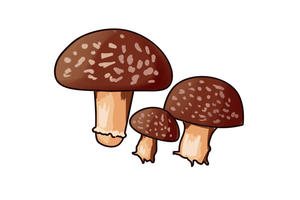

如何出插入图片：将代码框变成标记状态，复制图片到标记状态的代码框内，shit+enter,end

In [1]:
'''决策树  贪婪算法
决策整体流程：
1、导入算法库、所需模块，注意要解决中文乱码问题
2、导入数据，探索数据
3、划分数据集（训练集、测试集）
4、建立模型
5、画决策树
6、调整决策树中的参数寻找最优决策树
重要参数：
Criterion：Ent(信息熵)、gini(基尼系数)
random_state
spliter：best random
剪枝参数：
max_depth
min_sample_split
min_sample_leaf
max_feature
min_impurity_decrease  限制信息增益大小  父节点与子节点的信息增益差越大越好
'''
'''属性：特征重要性
KNC.feature_importance_
[*zip(target,KNC.feature_importances_)]'''

'''四个接口:
fit
score
apply
predict'''

'四个接口:\nfit\nscore\napply\npredict'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 一、特征选择

##    不纯度的度量 
###    1、信息熵

In [3]:
# 定义熵函数
def calEnt(dataset):  #dataset 数据集 数据框的形式
    n=dataset.shape[0] #总行数
    i=dataset.iloc[:,-1].value_counts() #呈现出各分类的统计情况
    p=i/n
    Ent=(-p*np.log2(p)).sum()
    ent=-sum(p*np.log2(p))
    print('Ent:',Ent,'ent:',ent) 

In [4]:
p=np.array([0.3,0.5])
ent=(-p*np.log2(p)).sum()
# p*np.log2(p) >0  求和后的结果也为正，此时的负号放在括号里面或外面结果都一样
Ent=-sum(p*np.log2(p))

In [5]:
def calEnt(dataset):  #dataset 数据集 数据框的形式
    n=dataset.shape[0] #总行数
    i=dataset.iloc[:,-1].value_counts() #呈现出各分类的统计情况
    p=i/n
    Ent=(-p*np.log2(p)).sum()
    return Ent    

## 2、 信息增益

In [6]:
data={'x1':[0,0,0,1,1],
     'x2':[1,1,0,1,1],
     'y':['yes','yes','no','no','no']}
data=pd.DataFrame(data)
data.head()

,x1,x2,y
0,0,1,yes
1,0,1,yes
2,0,0,no
3,1,1,no
4,1,1,no


In [7]:
calEnt(data)

0.9709505944546686

In [8]:
# x1信息增益
dec0=(3/5)*(-(2/3)*np.log2(2/3)-(1/3)*np.log2(1/3))
# x1=1的熵为0
dec0

0.5509775004326937

In [9]:
det0=calEnt(data)-dec0
det0

0.4199730940219749

In [10]:
# x2=1的信息增益
dec1=(4/5)*(-(1/2)*np.log2(1/2)-(1/2)*np.log2(1/2))
# x2=0的熵为0
dec1

0.8

In [11]:
det1=calEnt(data)-dec1
det1

0.17095059445466854

## 二 、决策树的算法
  

## 2.1、分类的决策树

 ## 2.1.1、ID3算法

In [ ]:
# 利用ID3算法建立决策树
# 特征选择的准则：决策树各个结点的信息增益准则

划分数据集的最大准则：最大信息增益 bestGain

In [71]:
# 定义ID3函数
def bestsplit(dataset): #数据
    baseEnt=calEnt(dataset) #调用信息熵函数，计算信息熵
    bestGain=0 #信息增益初始化
    axis=-1    #初始化最佳切分列
    
    for i in range(dataset.shape[1]-1): #对特征的每一列进行循环
        levels=dataset.iloc[:,i].value_counts().index  #提取出当前列的所有取值
        ents=0         #初始化子节点的信息增益
        for j in levels:  #循环取出当前列的每一个取值
            childset=dataset[dataset.iloc[:,i]==j]
            ent=calEnt(childset)  #计算某一个子节点的信息熵
            ents += (childset.shape[0]/dataset.shape[0])*ent  #计算当前列的信息增益
            print(f'第{i}列信息熵为{ents}')
        infoGain=baseEnt-ents  #当前列的信息增益
        print(f'第{i}列的信息增益为{infoGain}')
#         判断若当前列的信息增益与初始的信息增益大小
        if (infoGain > bestGain):  #选取信息增益最大的
            bestGain = infoGain
            axis=i  #最大信息增益所在的列
    return axis  
# 返回最大信息增益的列在第0列

In [72]:
# 测试定义的函数
bestsplit(data)

第0列信息熵为0.5509775004326937
第0列信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749
第1列信息熵为0.8
第1列信息熵为0.8
第1列的信息增益为0.17095059445466854


0

划分数据集

In [81]:
def mysplit(dataset,axis,value):
    col =dataset.columns[axis] #索引出列名
    redata = dataset.loc[dataset[col]==value,:].drop(col,axis=1)
    return redata #按照指定列索引和属性值切分数据集

In [73]:
data

,x1,x2,y
0,0,1,yes
1,0,1,yes
2,0,0,no
3,1,1,no
4,1,1,no


In [ ]:
# 索引出x2=1,y=no的数据
# 1、索引出x1=1所在的行，不能用x2=1来索（x2=1的不仅有y=no，还有y=yes）
# 2、 删除x1=1这一列

In [75]:
#索引出列名x1
col=data.columns[0]
col  

'x1'

In [76]:
data.loc[data[col]==1,:] #索引出x1=1

,x1,x2,y
3,1,1,no
4,1,1,no


In [77]:
data.loc[data[col]==1,:].drop(col,axis=1)  #删除x1这一列

,x2,y
3,1,no
4,1,no


In [82]:
mysplit(data,0,1)  #划分出索引号为0且值为1的

,x2,y
3,1,no
4,1,no


#### 利用ID3算法建立决策树

递归结束的条件是：
1、程序遍历完所有划分数据集的属性
2、每个分支下的所有实例都具有相同的分类
3、当前结点包含的样本集合为空，不能划分

In [108]:
def createTree(dataSet):
    featlist = list(dataSet.columns)       #递归条件1                 # 提取出数据集所有的列 
    classlist = dataSet.iloc[:,-1].value_counts()           # 获取最后一列类标签并统计个数降序排序
    # 判断最多标签的个数是否等于数据集行数，或者数据集是否只有一列  递归结束条件2、3
    if classlist[0]==dataSet.shape[0] or dataSet.shape[1] == 1:
        return classlist.index[0]                           # 如果是，返回类标签
    
    axis = bestsplit(dataSet)                               # 确定出当前最佳切分列的索引
    bestfeat = featlist[axis]                               # 获取该索引对应的特征
    
    myTree = {bestfeat:{}}                                  # 采用字典嵌套的方式存储树信息
    del featlist[axis]                                      # 删除当前特征
    valuelist = set(dataSet.iloc[:,axis])                   # 提取最佳切分列所有属性值
    for value in valuelist:                                 # 对每一个属性值递归建树
        myTree[bestfeat][value] = createTree(mysplit(dataSet,axis,value))
    return myTree

In [109]:
myTree=createTree(data)
myTree

第0列信息熵为0.5509775004326937
第0列信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749
第1列信息熵为0.8
第1列信息熵为0.8
第1列的信息增益为0.17095059445466854
第0列信息熵为0.0
第0列信息熵为0.0
第0列的信息增益为0.9182958340544896


{'x1': {0: {'x2': {0: 'no', 1: 'yes'}}, 1: 'no'}}

In [86]:
classlist=data.iloc[:,-1].value_counts()
print(classlist)
print(classlist[0])
classlist.index[0]

no     3
yes    2
Name: y, dtype: int64
3


'no'

## 2、1.2、CX5 算法

C4.5算法对ID3算法进行了改进,生成的过程中用信息增益比准则来选择特征。

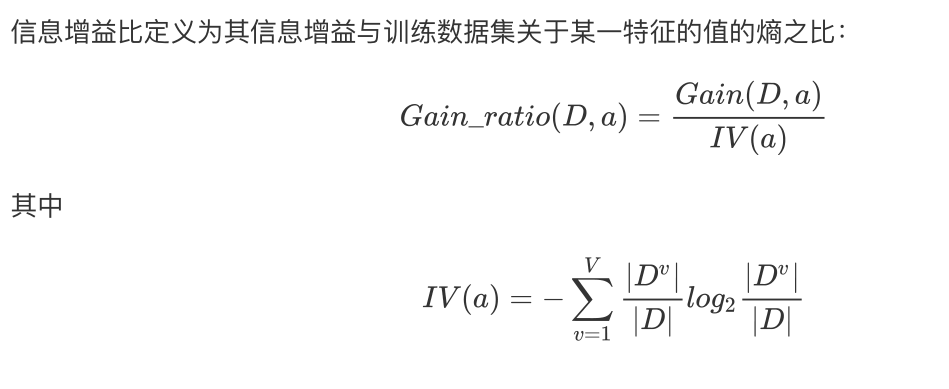

## 2.2、回归决策树  CAT算法

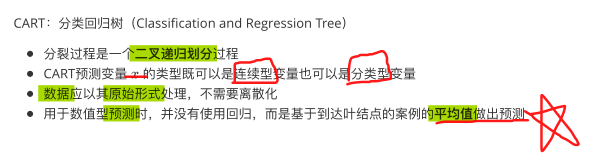

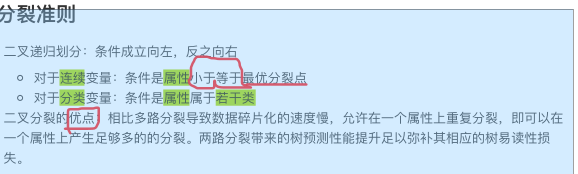

# ID3算法、CX5算法、CAT算法的比较
####  ID3： 寻找最大信息增益
####  CX5：信息增益率（比值）
####  CAT算法  回归决策树

# 三、决策树的建立

## 3.1、整体流程

In [12]:
'''
1、导入数据库、算法
2、探索数据
3、划分训练集、测试集
4、建立模型、模型评估
5、画决策树
6、探索寻找最佳决策树'''

'\n1、导入数据库、算法\n2、探索数据\n3、划分训练集、测试集\n4、建立模型、模型评估\n5、画决策树\n6、探索寻找最佳决策树'

In [13]:
# 1、导入数据库、算法
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 解决中文乱码wenti
plt.rcParams['font.sans-serif']=['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False
# 数据集
from sklearn.datasets import load_wine
# 划分数据集的包
from sklearn.model_selection import train_test_split 
# 树
from sklearn import tree

In [14]:
# 2、探索数据
wine=load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [15]:
# 提取特征、标签
X=wine.data
y=wine.target

In [16]:
# 特征
X.shape

(178, 13)

In [17]:
# 特征名称
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [18]:
# 特征数量
len(wine.feature_names)

13

In [19]:
# 标签
y.shape

(178,)

In [20]:
# 标签名称
wine.target_names
# 3类标签

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [21]:
# 3、划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)

In [22]:
# 训练集
Xtrain.shape

(124, 13)

In [23]:
# 测试集
Xtest.shape

(54, 13)

In [24]:
# 4、建立模型  
# 分类树
from sklearn.tree import DecisionTreeClassifier as DTC
#建立模型
dtc=DTC().fit(Xtrain,Ytrain)  #选用系统默认的参数
score=dtc.score(Xtest,Ytest)

In [25]:
# 查看模型评估效果
score

0.9444444444444444

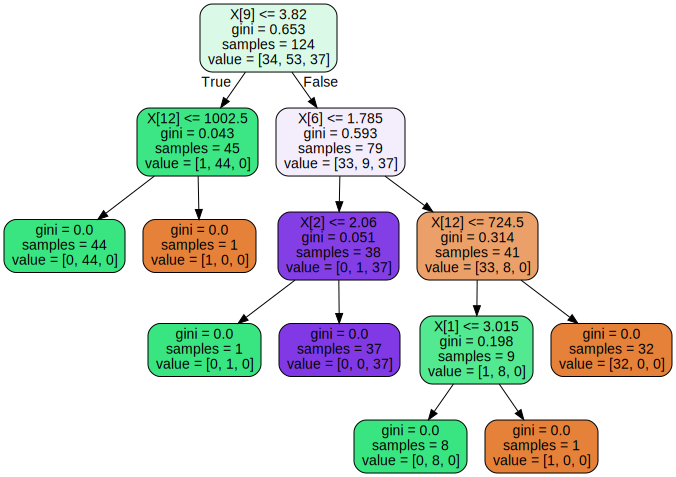

In [26]:
# 画决策树
import graphviz
wine_data=tree.export_graphviz(dtc,filled=True, #填充色
                      rounded=True)
graph=graphviz.Source(wine_data)
graph

In [27]:
# 保存生成的图片
# graph.render('wine') 
# 生成PDF文件；注意标题无法显示中文

#### 属性

特征重要性

In [28]:
# 探索决策树
dtc.feature_importances_

array([0.        , 0.02195225, 0.02404637, 0.        , 0.        ,
       0.        , 0.39557682, 0.        , 0.        , 0.39720941,
       0.        , 0.        , 0.16121515])

In [29]:
# 返回带有标签的特征重要性
[*zip(wine.feature_names,dtc.feature_importances_)]

[('alcohol', 0.0),
 ('malic_acid', 0.02195224501537985),
 ('ash', 0.024046373651715403),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.3955768217709794),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.39720941385141617),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.16121514571050916)]

节点个数

In [30]:
dtc.tree_.node_count

13

In [31]:
# 每个结点对应的属性索引值，-2表示叶子节点
dtc.tree_.feature
# 顺序  从左向右、由上到下，一枝完结，再计下一枝。

array([ 9, 12, -2, -2,  6,  2, -2, -2, 12,  1, -2, -2, -2], dtype=int64)

## 3.2、探索参数的取值

### 3.2.1、 超参数学习曲线  （确定最佳树深max_depth）

2
最佳训练效果：0.944


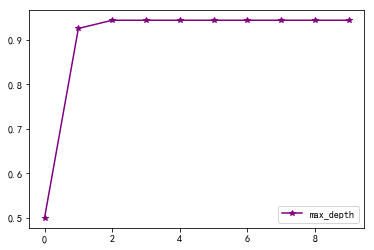

In [32]:
h=[]
irange=np.arange(10)
for i in irange:
    dtc=DTC(max_depth=i+1,random_state=30)
    dtc=dtc.fit(Xtrain,Ytrain)
    score=dtc.score(Xtest,Ytest)
    
    h.append(score)
#     print(i+1,score)
print(irange[h.index(max(h))])
print('最佳训练效果：%.3f'%max(h))
plt.plot(irange,h,color='purple',marker='*',label='max_depth')
plt.legend()
plt.show()


### 3.2.2、 网格搜索

In [33]:
#  运用网格搜索调整参数 找寻最佳决策树
from sklearn.model_selection import GridSearchCV #网格搜索
para_grid = {'criterion':('entropy','gini'),  #不纯度度量
             'splitter':('best','random'),    #控制决策树中随机选项
             'max_depth':range(2,11),
             'min_samples_split':range(2,20,2),
             'min_samples_leaf':range(1,10)}
# 设置参数网格
dtc=GridSearchCV(DTC(),para_grid,cv=5)

# 建模
dtc_=dtc.fit(Xtrain,Ytrain)

# 最优参数
print('best_params',dtc_.best_params_)
print('best_score',dtc_.best_score_)

best_params {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'random'}
best_score 0.9596774193548387


E:\python\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
# 得到网格搜索的结果，修改模型中的参数
print('未设置样本平衡') 
adj_dtc=DTC(criterion='entropy',max_depth=6,
        min_samples_leaf=3,min_samples_split=2,splitter='random')
adj_dtc=adj_dtc.fit(Xtrain,Ytrain)
adj_score=adj_dtc.score(Xtest,Ytest)
print('adj_score:',adj_score)

未设置样本平衡
adj_score: 0.9444444444444444


## 3.3、 分类模型的评估指标

In [35]:
# 1、二分类决策树中的样本不均衡问题
# 2、混淆矩阵

###  3.3.1、样本不均衡问题

原因：分类模型天生倾向于多数的类，牺牲少数类。
影响：会使模型失去意义

In [36]:
'''决策树中，调节样本使其均衡的参数：
1、class_weight  默认None 认为数据集中所有标签是均衡的
2、接口fit中可以设定的sample_weight'''

'决策树中，调节样本使其均衡的参数：\n1、class_weight  默认None 认为数据集中所有标签是均衡的\n2、接口fit中可以设定的sample_weight'

In [37]:
# 人为构造样本不均衡的数据
from sklearn.datasets import make_blobs

In [38]:
class1=1000 #人为设置类1的样本数为1000
class2=100   #人为设置类2的样本数为100
# 设置两个类别的中心
centers=[[0,0],[2,2]]
# 设定两类别的方差，一般情况下样本量大的数据分布比较稀松
cluster_std=[2.5,0.5]
# 构造数据
X,y=make_blobs(n_samples=[class1,class2],centers=centers,
               cluster_std=cluster_std,
               random_state=420,shuffle=False) #shuffle=True 每一次运行会刷新一下数据


In [39]:
X.shape

(1100, 2)

In [40]:
y.shape

(1100,)

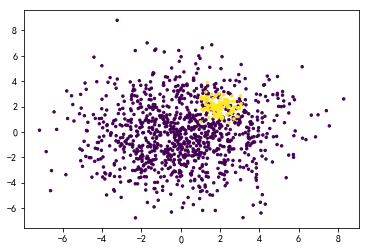

In [41]:
# 画两个类图
plt.scatter(X[:,0],X[:,1],s=6,c=y);
# 由图所得两个样本存在严重的不均衡问题

In [42]:
# 划分数据集
Xtrain1,Xtest1,Ytrain1,Ytest1=train_test_split(X,y,test_size=0.3,random_state=420)

建模

未调节样本均衡

In [43]:
# 将未调节样本均衡的模型训练结果与调节样本均衡的结果对比查看效果
dtc1=DTC()
dtc1 =dtc.fit(Xtrain1,Ytrain1)
score1=dtc.score(Xtest1,Ytest1)
score1

0.9424242424242424

调节样本均衡

In [44]:
#常用的调参方式决策树算法中的参数class_weight
w_dtc1=DTC(class_weight='balanced')
w_dtc1=w_dtc1.fit(Xtrain1,Ytrain1)
w_score1=w_dtc1.score(Xtest1,Ytest1)
w_score1

# 调整样本均衡情况后,模型的训练效果有所提升

0.896969696969697

###  3.3.2、混淆矩阵

为了能够尽量多的捕捉到少数类，又降低多数类判错的损失，在两者间寻找一个平衡点，引入混淆矩阵
最佳模型：在尽量捕捉少数类的情况下，尽量多的多数类判对

In [45]:
'''整体效果：
准确率：预测对的个数占总的个数的比重
少数类的捕捉：
精确率 accuracy：多数类判错的概率  少数类判错数/预测为少数类的总数
召回率（敏感度、真正率）precision ：少数类判对的概率       少数率判对数/少数类的总数
F1 Score：
我们追求的目标  尽量捕捉少数类，但不要误伤多数类的一个平衡点
F1 = 2 / ((1/accuracy)+(1/precision))=2*accuracy*precision/(accuracy+precision)
'''

'整体效果：\n准确率：预测对的个数占总的个数的比重\n少数类的捕捉：\n精确率 accuracy：多数类判错的概率  少数类判错数/预测为少数类的总数\n召回率（敏感度、真正率）precision ：少数类判对的概率       少数率判对数/少数类的总数\nF1 Score：\n我们追求的目标  尽量捕捉少数类，但不要误伤多数类的一个平衡点\nF1 = 2 / ((1/accuracy)+(1/precision))=2*accuracy*precision/(accuracy+precision)\n'

accuracy 、precision、recall、f1_score 可以根据计算公式手动实现，在此不详细写

## 混淆矩阵在sklearn中的实现

In [46]:
# 导入库
from sklearn import metrics

#### 未调整样本均衡情况下

In [47]:
# 查看预测的结果
pre01=dtc.predict(Xtest1)
pre01

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
# accuracy
# 注意先传真实值，再传预测值
accuracy=metrics.accuracy_score(Ytest1,pre01)
accuracy

0.9424242424242424

In [49]:
# precision
# 同上
precision01=metrics.precision_score(Ytest1,pre01)
precision01

0.6888888888888889

In [50]:
# recall
recall01=metrics.recall_score(Ytest1,pre01)
recall01

0.8611111111111112

In [51]:
# f1 score
f1_score=metrics.f1_score(Ytest1,pre01)
f1_score

0.7654320987654321

#### 调整样本均衡情况下

In [52]:
# 预测情况
w_pre01=dtc.predict(Xtest1)
w_pre01

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
# accuracy
w_accuracy=metrics.accuracy_score(Ytest1,w_pre01)
w_accuracy

0.9424242424242424

In [54]:
# precision
w_precision=metrics.precision_score(Ytest1,w_pre01)
w_precision

0.6888888888888889

In [55]:
# recall
w_recall=metrics.recall_score(Ytest1,w_pre01)
w_recall

0.8611111111111112

In [56]:
# f1 score
w_f1_score=metrics.f1_score(Ytest1,w_pre01)
w_f1_score

0.7654320987654321

#### 二分类标签的数据  如何选取最佳的参数

In [57]:
# 上文的8个重要参数，怎样设置能够使模型有较好的的泛化能力
# 1、经验
# 2、网格搜索（无太多业务经验，由系统选择）

未设置样本均衡参数class_weight

In [58]:
#  运用网格搜索调整参数 找寻最佳决策树
from sklearn.model_selection import GridSearchCV #网格搜索
para_grid = {'criterion':('entropy','gini'),  #不纯度度量
             'splitter':('best','random'),    #控制决策树中随机选项
             'max_depth':range(2,11),
             'min_samples_split':range(2,20,2),
             'min_samples_leaf':range(1,10)}
# 设置参数网格
dtc=GridSearchCV(DTC(),para_grid,cv=5)

# 建模
best_dtc=dtc.fit(Xtrain1,Ytrain1)

# 最优参数
print('best_params',best_dtc.best_params_)
print('best_score',best_dtc.best_score_)

best_params {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'}
best_score 0.9493506493506494


In [59]:
# 得到网格搜索的结果，修改模型中的参数
print('未设置样本平衡') 
adj_dtc1=DTC(criterion='entropy',max_depth=9,
        min_samples_leaf=5,min_samples_split=12,splitter='random')
adj_dtc1=adj_dtc1.fit(Xtrain1,Ytrain1)
adj_score1=adj_dtc1.score(Xtest1,Ytest1)
print('adj_score1:',adj_score1)

未设置样本平衡
adj_score1: 0.8909090909090909


In [60]:
# 未调节样本均衡时 
# 不设置任何参数  0.8939393939393939 
# 利用网格搜索后  0.9272727272727272

设置了样本均衡参数clas_weight

In [61]:
# 消除警告
import warnings
warnings.filterwarnings('ignore')

In [62]:
from sklearn.model_selection import GridSearchCV #网格搜索
para_grid = {'criterion':('entropy','gini'),  #不纯度度量
             'splitter':('best','random'),    #控制决策树中随机选项
             'max_depth':range(2,11),
             'min_samples_split':range(2,20,2),
             'min_samples_leaf':range(1,10)}
# 设置参数网格
adj_dtc_w1=GridSearchCV(DTC(class_weight='balanced'),para_grid,cv=5)

# 建模
best_dtc_w1=adj_dtc_w1.fit(Xtrain1,Ytrain1)

# 最优参数
print('best_params',adj_dtc_w1.best_params_)
print('best_score',adj_dtc_w1.best_score_)

best_params {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
best_score 0.9467532467532468


In [63]:
print('设置样本平衡')
wdtc1=DTC(criterion='gini',max_depth=6,min_samples_leaf=1,
         min_samples_split=2,
        splitter='best',class_weight='balanced')
adj_wdtc_w1=wdtc1.fit(Xtrain1,Ytrain1)
adj_score_w1=adj_wdtc_w1.score(Xtest1,Ytest1)
print('adj_score_w1:',adj_score_w1)

设置样本平衡
adj_score_w1: 0.9212121212121213


In [64]:
# 调节样本均衡时 
# 不设置任何参数  0.9090909090909091
# 网格搜索后   0.9212121212121213

无论是否调节样本均衡 ,  网格搜索后的模型效果都比初始的模型效果好